In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import time
import re

In [59]:
""" 
Helper Functions, not all are used 
"""
# Takes in a string that represents name of csv file and 
# converts that string to one that matches the date string present
# in the old master file (old master file refers to the raw excel file
# filled with extraneous data from BCI)that contains the date/times 
# for recorded GPP values
def change_csv_date(csv):
    minDivFiveFlag = True
    year = csv[2:4]
    month = csv[5:7]
    day = csv[8:10]
    hour = csv[11:13]
    minute = csv[14:16]
    second = "00"
    if (int(minute) % 5) != 0:
        print("THIS:", csv, "minute not divisible by 5")
        minDivFiveFlag = False
    if(int(hour) == 0):
        hour = "0"
    elif(int(hour) < 10):
        hour = hour[1:2]
    # No leading zeroes in day or month
    if(int(month) < 10):
        month = month[1:2]
    if(int(day) < 10):
        day = day[1:2]
    result = month + "/" + day + "/" + year + " " + hour + ":" + minute #+ ":" + second + " " + timeDay
    return result
# Function that checks if time/date is at 00 minutes
def check_zero_time_min(csv):
    if csv[14:16] == "00":
        return True
    else:
        return False
#  and 30 minutes
def check_thirty_time_min(csv):
    if csv[14:16] == "30":
        return True
    else:
        return False
# and at specific hour
def check_spec_time_hour(csv, hour):
    if csv[11:13]==hour:
        return True
    else:
        return False

# Takes in csv date (in format 'YYYY_MM_DD_HH_MM_bci_t') and checks to see if minutes are divisble by div
def check_csv_date(csv, div):
    result = False
    minute = int(csv[14:16])
    remainder = minute % div
    if(remainder == 0):
        result = True
    else:
        result = False
    return result

# Get int value of hour
def get_hour_int(csv):
    return int(csv[11:13])

def get_min_int(csv):
    return int(csv[14:16])
    

# Takes in csv date (in format 'YYYY_MM_DD_HH_MM_bci_t') and checks to see if it falls within the "morning" 4:00am - 12:00pm
def time_check_csv_date(csv, regex):
    return not (None == regex.match(csv))

In [87]:
"""
Determine what range of values are wanted and create list of relevant file names (csvfiles)
"""

# Master file holds ALL data colleceted (GPP, date, wind speed, etc) here we just to extract
# date and times
masterfileLocation = r"C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2"
masterFileName = "all-30min-Apr2018_working.csv"

# Regular expression to select time window 
# (based on date format of files: YYYY_MM_DD_HH_MM_bci_t)
# Here we take all values from June from 6:00am - 8:00pm
regex_time_range = re.compile("2015_06_15_(0[6-9]_..|1[0-9]_..|20_00)_bci_t")

# Create list of all avaialble thermal CSV values
csvdataLocation = r"D:\BCIDataBackup"
(_, _, csvfiles) = next(os.walk(csvdataLocation))

# Remove any items that arent thermal image csv files (in this case filtering by file name)
csvfiles = [item for item in csvfiles if 'bci_t' in item]
# Remove files not within date range with regex
csvfiles = [item for item in csvfiles if time_check_csv_date(item,regex_time_range)]

print(len(csvfiles))

169


In [88]:
print(type(csvfiles))

<class 'list'>


In [89]:

# Data for grabbing particular part of image (here by horizontal strips of which 
# are vertical in saved files)
#(top row) 240 - 0 (bottom row)
start_col = 230
end_col = 130
cols = ['V' + str(x) for x in range(start_col, end_col,-1)]

os.chdir(r"D:\BCIDataBackup")

# need to loop through files, take in, and then take mean mode etc...., HISTOGRAM
oneDimensionFull = np.empty(1)
oneDimensionFull= np.delete(oneDimensionFull, [0])
print(oneDimensionFull)
for filename in csvfiles:
    csv_dataframe = pd.read_csv(filename, usecols=cols)
    csv_numpy = (np.asarray(csv_dataframe)).flatten()
    oneDimensionFull = np.concatenate([oneDimensionFull, csv_numpy])
    
print(len(oneDimensionFull))


[]
5408000


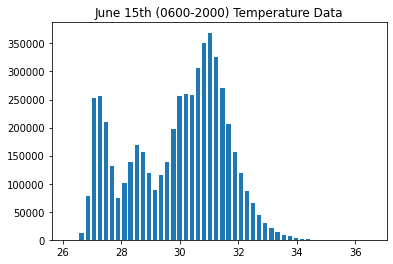

In [90]:
os.chdir(r"C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2\Pau Project\BCI_Modal_Investigation")
hist, bins = np.histogram(oneDimensionFull, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("June 15th (0600-2000) Temperature Data")
plt.savefig("June_Daytime_15th.png")
plt.show()